COVID19- TIME SERIES DATA- ANALYSIS

The main source of data for this analysis of ongoing COVID19 pandemic is the dataset prepared by John Hopkins UNiversity(JHU).
The time-series data in particular can be found here https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
from scipy import stats
from datetime import datetime 
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline

In [2]:
#Import time series data for confirmed cases

COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

print(covid_confirmed.shape)

covid_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)

covid_confirmed.head()


(267, 271)


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846


In [3]:
covid_confirmed.columns

Index(['Province/State', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/5/20', '10/6/20', '10/7/20', '10/8/20', '10/9/20', '10/10/20',
       '10/11/20', '10/12/20', '10/13/20', '10/14/20'],
      dtype='object', length=271)

In [4]:
#Import time series data for death cases

COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

covid_deaths = pd.read_csv(COVID_DEATHS_URL)

print(covid_confirmed.shape)

covid_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

covid_deaths.head()

(267, 271)


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,400,403,407,411,413,416,420,424,429,434
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,54,55,55,55,57,57,59
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,199,211,211,208,212,218,218,219,222,227


In [5]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

print(covid_recovered.shape)

covid_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)

covid_recovered.head()

(254, 271)


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32879,32977,33045,33058,33058,33064,33114,33118,33308,33354
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8825,8965,9115,9215,9304,9406,9500,9585,9675,9762
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36672,36763,36857,36958,37067,37170,37170,37382,37492,37603
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1615,1615,1715,1715,1814,1814,1814,1928,1928,2011
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2591,2598,2598,2635,2685,2716,2743,2744,2761,2801


In [6]:
#Dropping lat and long - unused columns , Filling spaces for null values of Province/State column
covid_confirmed = covid_confirmed.drop(columns = ['Lat', "Long"])
covid_deaths = covid_deaths.drop(columns = ['Lat', "Long"])
covid_recovered = covid_recovered.drop(columns = ['Lat', "Long"])

covid_confirmed[['Province/State']] = covid_confirmed[['Province/State']].fillna('')
covid_confirmed.fillna(0, inplace=True)

-----------------------------------------------COVID-INDIA-SWEDEN-ANALYSIS-----------------------------------------------------

In [7]:
#TIME-SERIES PLOT OF THE 4 COUNTRIES IN SCOPE 
#get columns corresponding to 6 weeks starting from 8/30/20 till date

#extract the dates needed
data = list(covid_confirmed.columns[0:2]) + list(covid_confirmed.columns[-46:])

#we're interested in these countries, so including only those 4. Netherlands Carribean is filtered out.
countries = ['India','Netherlands','Sweden','Malaysia']
covid_filtered = covid_confirmed.loc[(covid_confirmed['Country'].isin(countries)), data]
covid_filtered = covid_filtered[(covid_filtered['Province/State'] == '')]
covid_filtered

,Province/State,Country,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,...,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
143,,India,3621245,3691166,3769523,3853406,3936747,4023179,4113811,4204613,...,6685082,6757131,6835655,6906151,6979423,7053806,7120538,7175880,7239389,7307097
171,,Malaysia,9334,9340,9354,9360,9374,9385,9391,9397,...,12813,13504,13993,14368,14722,15096,15657,16220,16880,17540
190,,Netherlands,70140,70667,71129,71863,72464,73208,73862,74787,...,135892,144999,149988,155810,161781,168280,174653,181498,188876,196163
231,,Sweden,83958,84379,84521,84532,84729,84985,84985,84985,...,94283,96145,96677,97532,98451,98451,98451,98451,100654,101332


In [8]:
#Time series plot of confirmed cases for 4 selected countries 
covid_filtered = covid_filtered.groupby(['Country']).sum()
covid_filtered.transpose().iplot(title = 'Time series of confirmed cases of countries')

In [24]:
#get columns corresponding to 6 weeks starting from 8/30/20 till date 
#Pulling the dataset with same conditions as that of the previous one.(for confirmed cases)

covid_deaths[['Province/State']] = covid_deaths[['Province/State']].fillna('')
covid_deaths.fillna(0, inplace=True)

data = list(covid_deaths.columns[0:2]) + list(covid_deaths.columns[-46:])
countries = ['India','Netherlands','Sweden','Malaysia']
covid_filtered1 = covid_deaths.loc[(covid_deaths['Country'].isin(countries)), data]
covid_filtered1 = covid_filtered1[(covid_filtered1['Province/State'] == '')]
covid_filtered1

,Province/State,Country,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,...,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20
143,,India,62550,63498,64469,65288,66333,67376,68472,69561,...,101782,102685,103569,104555,105526,106490,107416,108334,109150,109856
171,,Malaysia,125,125,126,127,128,128,128,128,...,137,137,137,141,141,146,152,155,157,159
190,,Netherlands,6220,6224,6224,6224,6230,6235,6235,6237,...,6449,6454,6454,6482,6518,6531,6544,6567,6584,6596
231,,Sweden,5821,5821,5821,5808,5813,5820,5832,5835,...,5895,5895,5895,5883,5892,5892,5894,5894,5894,5894


In [40]:
#Time series plot of mortality cases for 4 selected countries 
covid_filtered1 = covid_filtered1.groupby(['Country']).sum()

#get countries with most cases on last date in dataframe
covid_filtered1 = covid_filtered1.sort_values(by = covid_filtered1.columns[-1], ascending = False).head(4)

covid_filtered1.transpose().iplot(title = 'Time series of mortality cases of countries ')

As per the data , which is corresponding to September till date it can be seen that Malaysia has a very low mortality rate .
While though India being the highest in the no.of confirmed cases (nearly 80 million) reported so far , the death percentage seems low in proportion to the huge number of cases.  The population and population density are also two major factors contributing to the rapid increase in India.

In [32]:
#Converting the data into long format for ease of analysis and further interpretation.

covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :2],
                               var_name='date',
                               value_name='confirmed')
covid_confirmed_long

covid_deaths_long = pd.melt(covid_deaths,
                               id_vars=covid_deaths.iloc[:, :2],
                               var_name='date',
                               value_name='deaths')

In [63]:
covid_countries_date_df = covid_confirmed_long.groupby(['Country', 'date'], sort=False).sum().reset_index()


countries = pd.read_csv('../data/population_by_country_2020.csv')
countries.rename(columns={'Country (or dependency)':'Country' , 'Population (2020)':'Population'}, inplace=True)


countries_date_df = countries.groupby(['Country'],sort=False).sum().reset_index()
countries_date_df.head()

,Country,Population,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
0,China,1440297825,5540090,153,9388211,-348399.0
1,India,1382345085,13586631,464,2973190,-532687.0
2,United States,331341050,1937734,36,9147420,954806.0
3,Indonesia,274021604,2898047,151,1811570,-98955.0
4,Pakistan,221612785,4327022,287,770880,-233379.0


In [64]:
df1 = countries_date_df[['Country', 'Population']]

In [65]:
#merge population file along with time series data to normalize cases per million 
covid_confirmed_merged = pd.merge(left=covid_countries_date_df, right=df1, left_on='Country',
                 right_on='Country', how='left')
covid_confirmed_merged['Population_million'] = round((covid_confirmed_merged['Population']/1000),2)
covid_confirmed_merged['Cases_per_Million'] = round((covid_confirmed_merged['confirmed']/covid_confirmed_merged['Population_million']),2)


In [66]:
#Was Sweden's voluntary lockdown strategy a success ?
#Sweden was one of the countries not to impose a compulsory lockdown when the rest of the Europe and world were under lockdown during Mar-May.
#They had an unsual strategy for tackling the outbreak which is hailed both as a success and condemned as a failure.

#filter for the chosen countries for the month of June 
countries = ['India','Netherlands','Sweden','Malaysia']
covid_countries = covid_confirmed_merged[covid_confirmed_merged.Country.isin(countries)]

covid_countries['date'] = pd.to_datetime(covid_countries['date'])
start_date = '6/1/20'
end_date = '6/30/20'
mask = (covid_countries['date'] >= start_date) & (covid_countries['date'] <= end_date)
covid_countries = covid_countries.loc[mask]
covid_countries.head()

,Country,date,confirmed,Population,Population_million,Cases_per_Million
24838,India,2020-06-01,198370,1.382345e+09,1382345.08,0.14
24866,Malaysia,2020-06-01,7857,3.243696e+07,32436.96,0.24
24881,Netherlands,2020-06-01,46749,1.714154e+07,17141.54,2.73
24922,Sweden,2020-06-01,39309,1.011023e+07,10110.23,3.89
25027,India,2020-06-02,207191,1.382345e+09,1382345.08,0.15


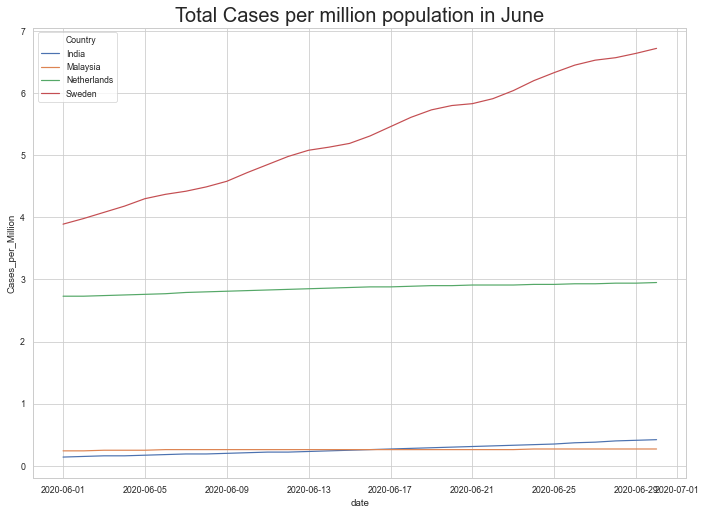

In [67]:
#plotting style specs
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style = 'whitegrid',context = 'paper')

from datetime import date
covid_countries.pivot_table(index = 'Country',values='Cases_per_Million',aggfunc={'Cases_per_Million':'sum'})
cases_plot = sns.lineplot(x = 'date', y = 'Cases_per_Million',hue = 'Country',data = covid_countries).set_title("Total Cases per million population in June", fontsize = 20)
plt.show()

Sweden , in the month of June had the steepest rise in the cases compared to its counterparts in the plot.(It is to be noted that Sweden is less populated than Netherlands as per the data available)
Whereas , in NL followed by the lockdown period in March-Apr there is indeed a somewhat flattened curve in the middle and then a slight increase for a shorter time period.

Hence , with the data available for the analysis done over the specific time period ,the Netherlands did a better job in terms of controlling the infection rate .

The picture in India starts getting worse after the mid of June, after which the country has not seen a significant drop in the infection.

In [68]:
#With the above disturbing picture of Sweden , it would be a good idea to calculate the confidence intervals for the average number of cases per million in Sweden at 95% confidence level

covid_countries_SW = covid_countries[covid_countries['Country'] == 'Sweden']

sample_mean = covid_countries_SW.loc[:,"Cases_per_Million"].mean()
sample_std = covid_countries_SW.loc[:,"Cases_per_Million"].std()

#sample size 
n = len(covid_countries_SW)

confidence_lvl = 0.95

z = stats.norm.interval(confidence_lvl)[1]

margin_error = sample_std/np.sqrt(n)
conf = [sample_mean - (z * margin_error) , sample_mean + (z * margin_error)]
conf_int = [round(num, 2) for num in conf]
print('With ' + str(confidence_lvl * 100) + '% confidence, the true mean of the cases per million in Sweden ,lies within the interval:', conf_int)

With 95.0% confidence, the true mean of the cases per million in Sweden ,lies within the interval: [4.99, 5.63]
